#Abstract

El objetivo de este proyecto es desarrollar un modelo analítico para entender y prever las dinámicas de las reservas de hotel. El análisis se centra en varios aspectos clave de las reservas utilizando un conjunto de datos que incluye variables como 'Tipo de Hotel', 'Fecha de Llegada', 'Tiempo de Anticipación de la Reserva', 'Número de Adultos' y 'Tasa de Cancelación'.

##Hipótesis y Preguntas de Investigación:
Se han formulado hipótesis y preguntas en áreas clave:

Tasa de Cancelación por Tipo de Hotel: ¿Existen diferencias significativas en las tasas de cancelación entre diferentes tipos de hoteles?

Variabilidad Estacional: ¿Cómo fluctúan las tasas de reserva y cancelación a lo largo del año?

Relación entre Precio y Cancelación: ¿El costo de la reserva influye en la probabilidad de cancelación?

Metodología y Herramientas:

Se emplearán diversas técnicas analíticas, incluyendo:

##Estadísticas Descriptivas:

Para obtener un entendimiento general de los datos.

##Visualizaciones:

Gráficos de línea y barras para analizar tendencias y patrones.

##Análisis de Correlación:

Para investigar cómo diferentes variables están interconectadas.

##Limpieza de Datos:

La limpieza de datos se realizará para manejar valores faltantes y atípicos, utilizando métodos como la imputación y la identificación de outliers mediante boxplots.

##Impacto y Direcciones Futuras:

Este análisis proporcionará una comprensión detallada de las dinámicas de reserva y cancelación en la industria hotelera. Los hallazgos podrían informar estrategias de gestión y marketing, así como servir como base para modelos predictivos más complejos.

En resumen, el proyecto no solo aborda las preguntas e hipótesis planteadas, sino que también busca ofrecer un conjunto de recomendaciones estratégicas que podrían mejorar la eficiencia operativa y la experiencia del cliente en el sector hotelero.

# Definición de Objetivo
Objetivo General:
Desarrollar un modelo analítico que permita entender los patrones de reserva y cancelación en hoteles para optimizar la gestión de ingresos y mejorar la experiencia del cliente.

# Contexto Comercial
La industria hotelera enfrenta desafíos únicos en términos de gestión de ingresos debido a la estacionalidad, la variabilidad en la demanda y las tasas de cancelación. Un análisis detallado de los datos de reserva puede ofrecer insights valiosos que ayuden a los hoteles a tomar decisiones más informadas en áreas como fijación de precios, promociones y gestión de la capacidad.



# Problema Comercial

El principal problema comercial que se aborda es la optimización de la Tarifa Diaria Promedio (ADR) y la reducción de las tasas de cancelación. Entender los factores que influyen en estos dos aspectos puede llevar a estrategias más efectivas para maximizar los ingresos y mejorar la satisfacción del cliente.



# Contexto Analítico
Para resolver este problema, se realizará un Análisis Exploratorio de Datos (EDA) seguido de modelado estadístico o de aprendizaje automático. Las principales áreas de enfoque en el EDA incluirán la estacionalidad, la tasa de cancelación y la relación entre diferentes variables como el tipo de hotel y el ADR.

# Carga de Datos

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Esto es para visualizar todas las columnas

pd.set_option('display.max_columns', None)

In [ ]:
# Esto es para mostrar solo los primeros 2 decimales en los datos  "float"

pd.options.display.float_format = "{:.2f}".format

In [ ]:
url='https://raw.githubusercontent.com/jloreto9/datasciencecoder/main/hotel_bookings.csv'

In [ ]:
df=pd.read_csv(url)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03


In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Convertir las columnas en una única columna de tipo 'datetime'

df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str))

# Eliminar las columnas originales

df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1, inplace=False)

# Verificar la conversión mostrando las primeras filas

df[['arrival_date']].head()


,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01


#Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una etapa crucial en cualquier proyecto de ciencia de datos. Nos ayuda a entender la estructura, patrones y relaciones entre las variables en el conjunto de datos. A continuación, se presentan algunas de las técnicas básicas de EDA que podrías incluir en tu cuaderno Jupyter.

##Descripción General de los Datos

Primero, vamos a revisar algunas estadísticas descriptivas básicas para las columnas numéricas.

In [ ]:
# Estadísticas descriptivas básicas
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119386.00,119390.00,119390.00,119390.00,119390.00,119390.00,103050.00,6797.00,119390.00,119390.00,119390.00,119390.00
mean,0.37,104.01,2016.16,27.17,15.80,0.93,2.50,1.86,0.10,0.01,0.03,0.09,0.14,0.22,86.69,189.27,2.32,101.83,0.06,0.57
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.40,0.10,0.18,0.84,1.50,0.65,110.77,131.66,17.59,50.54,0.25,0.79
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00
25%,0.00,18.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,62.00,0.00,69.29,0.00,0.00
50%,0.00,69.00,2016.00,28.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,179.00,0.00,94.58,0.00,0.00
75%,1.00,160.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,229.00,270.00,0.00,126.00,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.00,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00


La variable is_canceled muestra que aproximadamente el 37% de las reservas son canceladas.
La variable lead_time tiene un rango bastante amplio, lo que indica una gran variabilidad en el tiempo que la gente reserva con anticipación.


##Valores Faltantes

Es esencial identificar y manejar los valores faltantes en el conjunto de datos.

In [ ]:
# Verificar valores faltantes
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Las columnas como children, country, agent y company tienen valores faltantes que deberían abordarse.

##Análisis de Variables Categóricas

Para las variables categóricas como 'Tipo de Hotel' o 'Tipo de Comida', podemos utilizar gráficos de barras para visualizar la distribución.

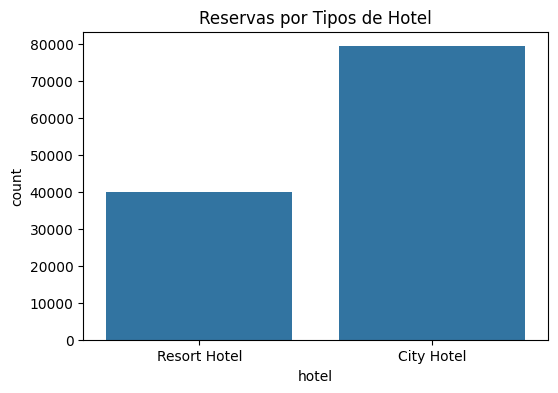

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x='hotel'
)
plt.title('Reservas por Tipos de Hotel')
plt.show()

##Análisis de Variables Numéricas

Para variables numéricas como 'lead_time' o 'adr' (tarifa diaria promedio), podríamos utilizar histogramas o gráficos de densidad.

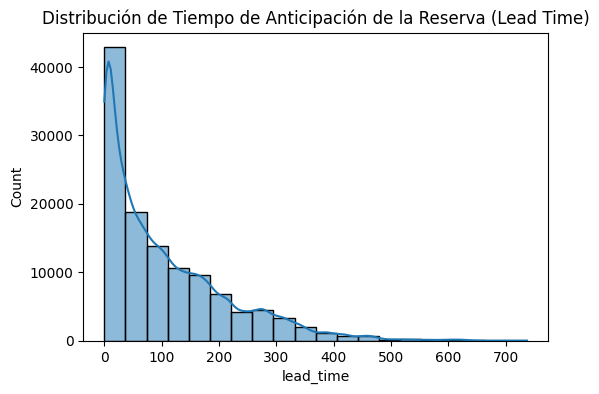

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(
    df['lead_time'],
    bins=20,
    kde=True
)
plt.title('Distribución de Tiempo de Anticipación de la Reserva (Lead Time)')
plt.show()

El histograma para 'lead_time' muestra que la mayoría de las reservas se hacen con una anticipación de menos de 100 días.

##Relaciones entre Variables

Para entender cómo las variables interactúan entre sí, podemos usar gráficos de dispersión, gráficos de caja o matrices de correlación.

<ipython-input-40-0f77cfa36c80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


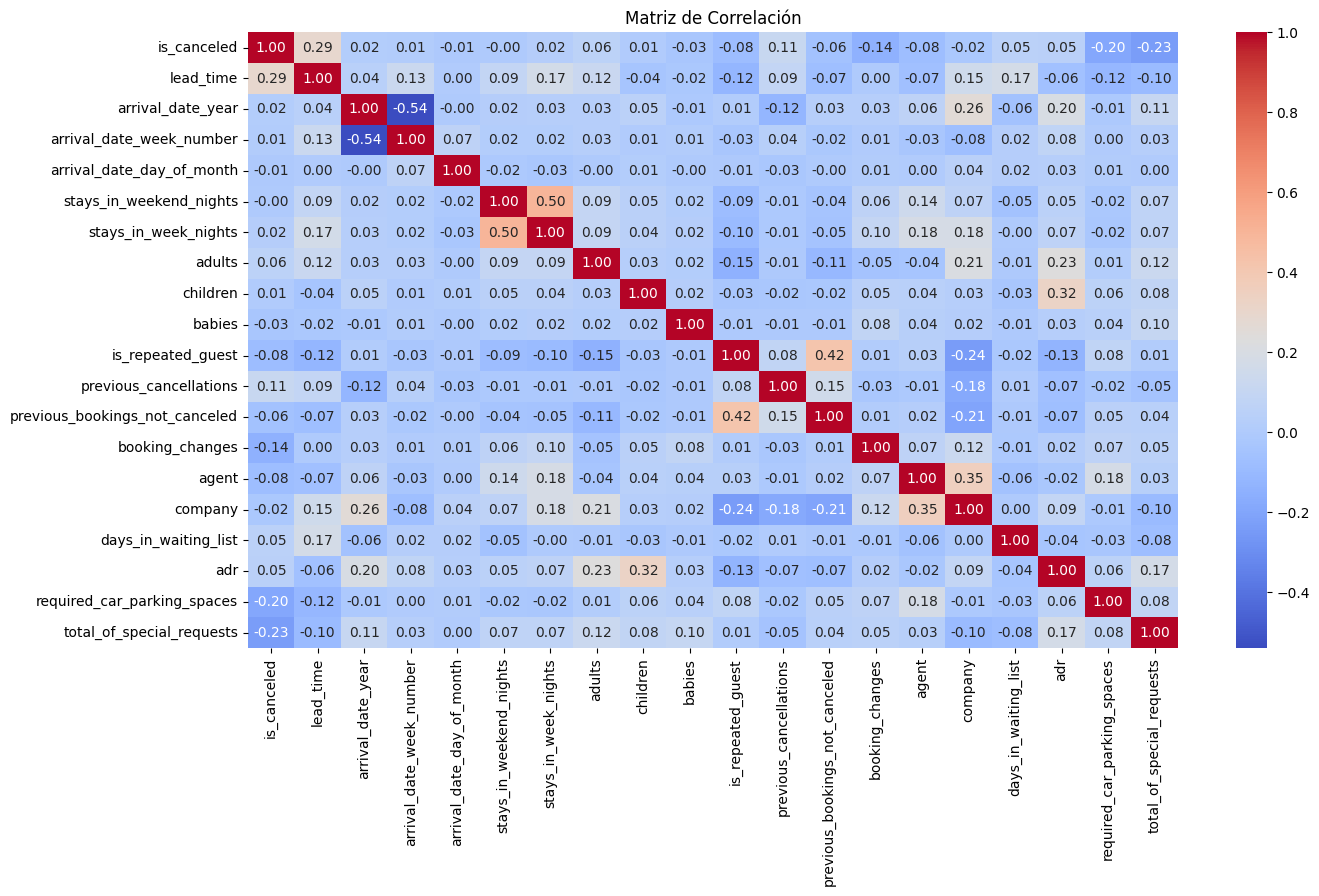

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title('Matriz de Correlación')
plt.show()

En la matriz de correlación, algunas variables muestran correlaciones moderadas entre sí. Por ejemplo, is_canceled parece tener alguna correlación con lead_time.

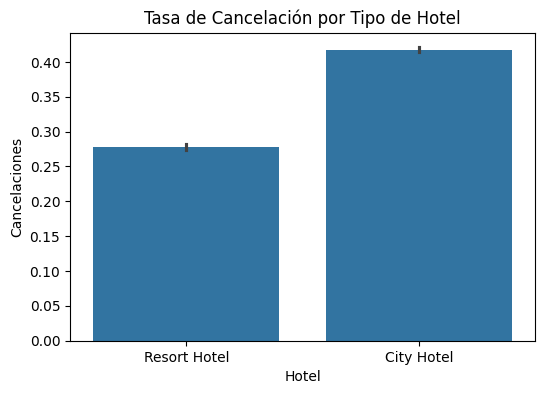

In [ ]:
# Tasa de Cancelacion por tipo de hotel
plt.figure(figsize=(6, 4))
sns.barplot(
    x='hotel',
    y='is_canceled',
    data=df
).set(xlabel='Hotel', ylabel='Cancelaciones')

plt.title('Tasa de Cancelación por Tipo de Hotel')
plt.show()

##Evolución del ADR a lo largo del Tiempo

Este gráfico de línea muestra cómo la Tarifa Diaria Promedio (ADR) fluctúa a lo largo del tiempo, proporcionando insights sobre la estacionalidad y la variabilidad en los precios de las habitaciones del hotel.



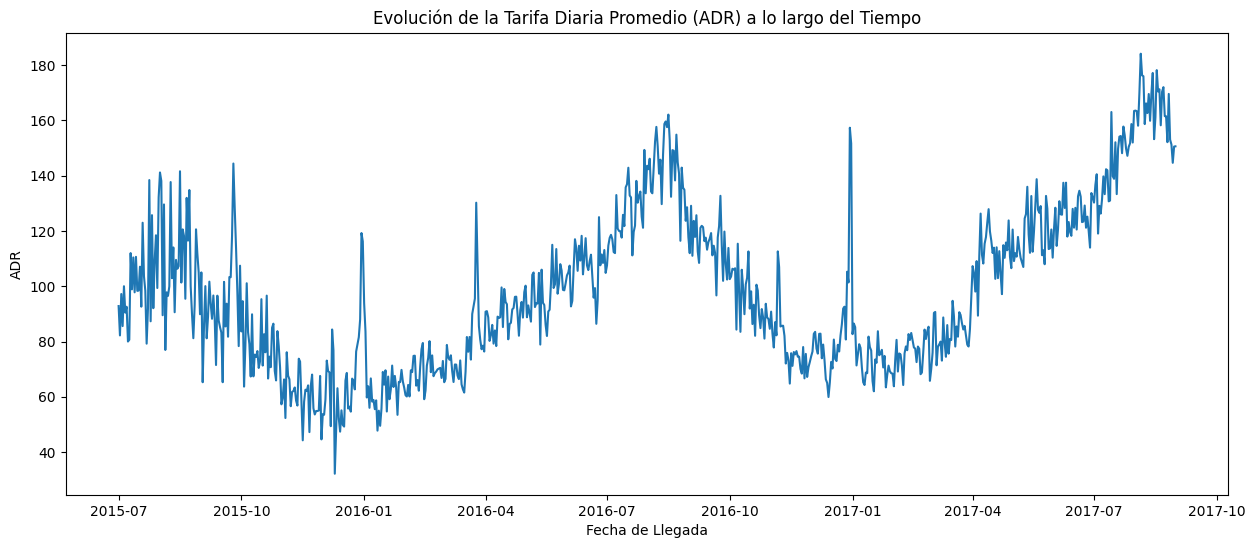

In [ ]:
# Agrupamos los datos por la fecha de llegada y calculamos la tarifa diaria promedio (ADR) para cada día.
grouped_adr = df.groupby('arrival_date')['adr'].mean().reset_index()

# Ahora, creamos un gráfico de línea para la tarifa diaria promedio (ADR) a lo largo del tiempo.
plt.figure(figsize=(15, 6))
sns.lineplot(
    x='arrival_date',
    y='adr',
    data=grouped_adr
)
plt.title('Evolución de la Tarifa Diaria Promedio (ADR) a lo largo del Tiempo')
plt.xlabel('Fecha de Llegada')
plt.ylabel('ADR')
plt.show()


## Conclusión del Gráfico Lineal del ADR

El gráfico revela fluctuaciones notables en la Tarifa Diaria Promedio (ADR) a lo largo del tiempo. Estas variaciones pueden estar influenciadas por factores como la estacionalidad o eventos especiales, y señalan la necesidad de un análisis más profundo para entender las dinámicas de precios en el hotel.

##Estacionalidad del ADR Desglosada por Mes

Este gráfico de barras tiene como objetivo explorar la estacionalidad en la Tarifa Diaria Promedio (ADR) del hotel. Al desglosar el ADR por mes, podemos identificar patrones de demanda y precio que son cruciales para la estrategia de gestión de ingresos del hotel.

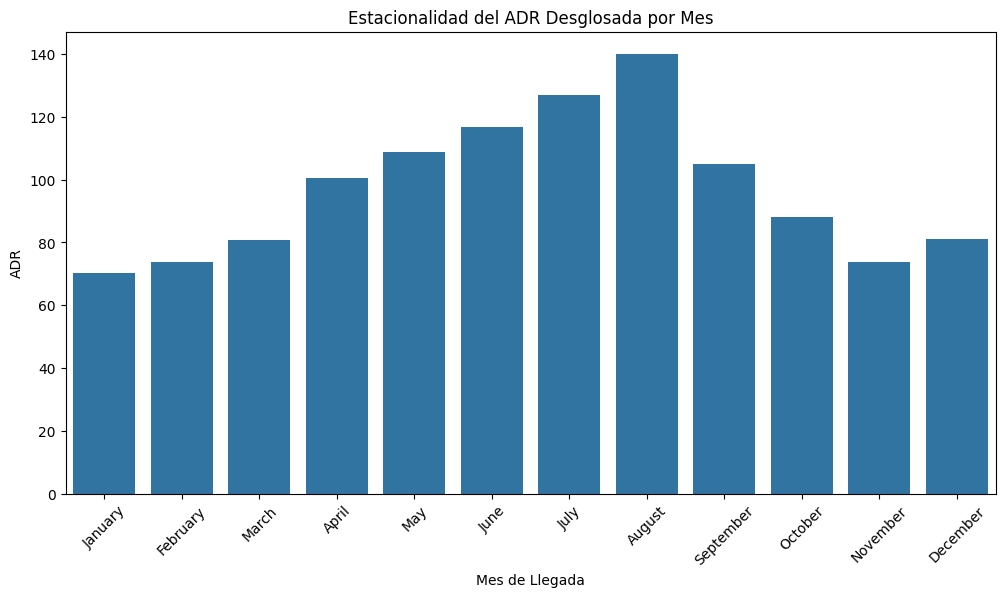

In [ ]:
# Primero, creamos una nueva columna que representa el mes de cada fecha de llegada para facilitar la representación gráfica.
df['arrival_date_month'] = df['arrival_date'].dt.month_name()

# Ordenamos los meses cronológicamente para la representación gráfica
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Agrupamos los datos por mes de llegada y calculamos la tarifa diaria promedio (ADR) para cada mes.
grouped_adr_monthly = df.groupby('arrival_date_month')['adr'].mean().reindex(months_order).reset_index()

# Creamos un gráfico de barras para el ADR promedio por mes para observar la estacionalidad.
plt.figure(figsize=(12, 6))
sns.barplot(
    x='arrival_date_month',
    y='adr',
    data=grouped_adr_monthly,
    order=months_order
)
plt.title('Estacionalidad del ADR Desglosada por Mes')
plt.xlabel('Mes de Llegada')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.show()


## Conclusión del Gráfico de Barras del ADR por Mes

El gráfico indica que el ADR varía considerablemente a lo largo de los meses. Los meses de verano, en particular junio y agosto, muestran un ADR más elevado en comparación con otros meses. Esto podría deberse a una mayor demanda turística durante la temporada de verano. Por el contrario, los meses más fríos como noviembre y enero tienen un ADR más bajo, lo que podría señalar una disminución en la demanda.

Este análisis sugiere que la estacionalidad tiene un impacto significativo en el ADR y, por lo tanto, en la estrategia de precios del hotel.

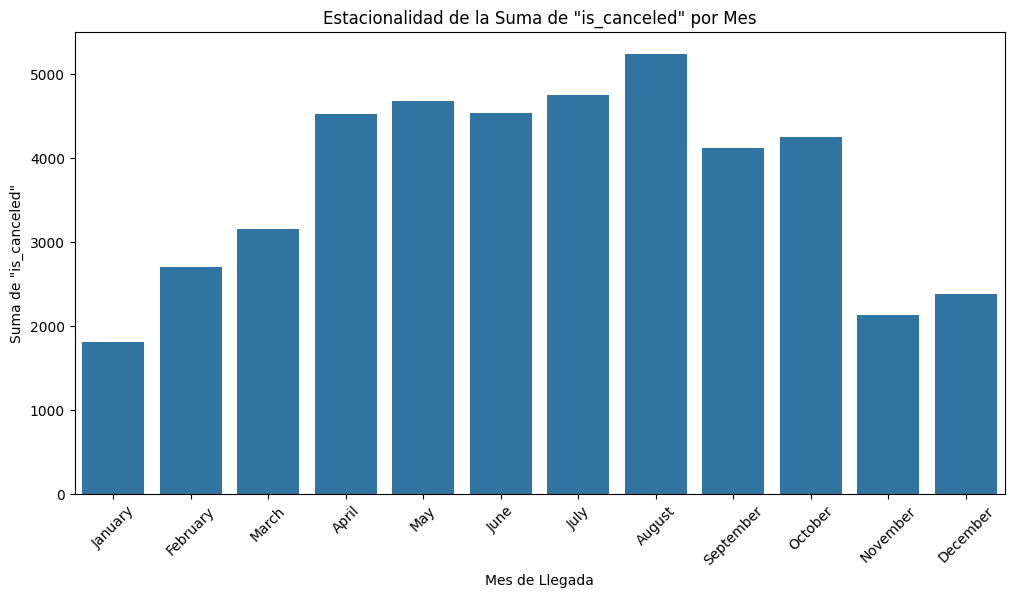

In [ ]:
# Agrupamos los datos por mes de llegada y calculamos la suma de 'is_canceled' para cada mes.
grouped_canceled_monthly = df.groupby('arrival_date_month')['is_canceled'].sum().reindex(months_order).reset_index()

# Creamos un gráfico de barras para la suma de 'is_canceled' por mes para observar la estacionalidad.
plt.figure(figsize=(12, 6))
sns.barplot(
    x='arrival_date_month',
    y='is_canceled',
    data=grouped_canceled_monthly,
    order=months_order
)
plt.title('Estacionalidad de la Suma de "is_canceled" por Mes')
plt.xlabel('Mes de Llegada')
plt.ylabel('Suma de "is_canceled"')
plt.xticks(rotation=45)
plt.show()


# Resultados Exploración de Datos (EDA)


## Resumen de hallazgos:

*Tasa de Cancelación*: Los hoteles de ciudad tienen una tasa de cancelación más alta en comparación con los hoteles tipo resort.

*Estacionalidad en el ADR*: El ADR muestra una variabilidad significativa a lo largo de los meses, con picos durante la temporada de verano.

*Relación entre Precio y Cancelación*: No se observa una correlación clara entre el ADR y las tasas de cancelación.

*Siguientes Pasos*:
Investigar las causas detrás de los picos y valles en el ADR.
Correlacionar estas fluctuaciones con otras variables, como la tasa de cancelación o el tipo de hotel.

In [ ]:
# Importando las bibliotecas necesarias
from sklearn.impute import SimpleImputer

# Verificando las columnas que tienen valores NaN y su cantidad
nan_summary = df.isna().sum()
print("Columnas con NaN antes de imputar o eliminar:")
print(nan_summary[nan_summary > 0])

# Creando un objeto SimpleImputer para cada tipo de imputación
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')

# Imputando las columnas 'children' y 'country'
df['children'] = imputer_median.fit_transform(df[['children']])
df['country'] = imputer_mode.fit_transform(df[['country']])

# Eliminando la columna 'company'
df.drop('company', axis=1, inplace=True)

# Imputando la columna 'agent' con la mediana
df['agent'] = imputer_median.fit_transform(df[['agent']])

# Verificando si aún hay valores NaN en el DataFrame
nan_summary_after = df.isna().sum()
print("Columnas con NaN después de imputar o eliminar:")
print(nan_summary_after[nan_summary_after > 0])

Columnas con NaN antes de imputar o eliminar:
children         4
country        488
agent        16340
company     112593
dtype: int64
Columnas con NaN después de imputar o eliminar:
Series([], dtype: int64)


In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.00,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.00,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.00,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.00,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.00,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.00,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.00,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
# Columnas categóricas seleccionadas para "dummyficar"
selected_categorical_columns = [
    'hotel', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type'
]

# Realizando la "dummyficación" usando pd.get_dummies
df_dummies = pd.get_dummies(df[selected_categorical_columns], drop_first=True)

# Eliminando las columnas categóricas originales
df.drop(selected_categorical_columns, axis=1, inplace=True)

# Concatenando el DataFrame original y el DataFrame "dummyficado"
df = pd.concat([df, df_dummies], axis=1)

In [ ]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,0,0,0,3,14.00,0,0.00,0,0,Check-Out,2015-07-01,2015-07-01,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,0,0,0,4,14.00,0,0.00,0,0,Check-Out,2015-07-01,2015-07-01,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,0,0,0,0,14.00,0,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,0,0,0,0,304.00,0,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,0,0,0,0,240.00,0,98.00,0,1,Check-Out,2015-07-03,2015-07-01,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(119390, 62)

# Formulacion del Modelo

El código proporcionado utiliza un algoritmo de K-Nearest Neighbors (KNN) para predecir si una reserva de hotel será cancelada o no. El objetivo es identificar patrones en las características de las reservas que se asocian con la cancelación, para poder predecir con mayor precisión qué reservas tienen mayor riesgo de ser canceladas.

**Metodología**:

- *Separación de variables*: Se dividen las variables independientes (características de la reserva) y la variable objetivo (si la reserva fue cancelada o no).
Eliminación de variables irrelevantes: Se eliminan las columnas de texto que no se han convertido en variables dummy, ya que KNN no puede procesar directamente este tipo de datos.
División de datos: Se dividen los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo KNN, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento.
Análisis:

- *Algoritmo KNN*: KNN busca los k vecinos más cercanos a una nueva instancia de datos y predice la clase de la nueva instancia en función de las clases de sus vecinos.
- *Selección de k*: El valor de k se elige mediante un proceso de validación cruzada para encontrar el valor que optimiza la precisión del modelo.
Evaluación del modelo: La precisión del modelo se evalúa utilizando la métrica de accuracy_score, que calcula la proporción de predicciones correctas.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separando las variables independientes y la variable objetivo
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Eliminando columnas de texto que no se han "dummyficado"
X = X.select_dtypes(include=[int, float])

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Creando el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#Fiteo el modelo
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
# Lista para almacenar las características seleccionadas y su rendimiento
selected_features = []
best_accuracy = 0.0

## Explicación del bucle para la selección hacia adelante

Este bucle implementa el método de selección hacia adelante para seleccionar las características más importantes para la predicción de cancelaciones de reservas. El método comienza con un conjunto vacío de características y luego agrega iterativamente las características que mejoran la precisión del modelo.

**Metodología**:

- *Recorrido de las características*: Se recorren todas las características disponibles.
- *Evaluación de cada característica*: Para cada característica, se crea un conjunto temporal de características que incluye las características ya seleccionadas y la característica actual.
- *Entrenamiento del modelo*: Se entrena un modelo KNN con el conjunto temporal de características.
- *Evaluación del rendimiento del modelo*: Se evalúa la precisión del modelo en el conjunto de prueba.
- *Actualización de las mejores características*: Si la precisión del modelo mejora con la adición de la característica actual, se actualiza el conjunto de mejores características para incluir la nueva característica.

**Análisis**:

- *Selección hacia adelante*: Este método es un algoritmo greedy que busca encontrar un conjunto de características óptimo localmente.
Criterio de selección: El criterio de selección utilizado es la precisión del modelo en el conjunto de prueba.
Validación cruzada: Es importante utilizar la validación cruzada para evitar el sobreajuste del modelo.

In [ ]:
# Bucle para implementar la selección hacia adelante
for feature in X_train.columns:
    temp_features = selected_features.copy()
    temp_features.append(feature)

    # Entrenar el modelo con el conjunto temporal de características
    knn.fit(X_train[temp_features], y_train)

    # Evaluar el rendimiento del modelo en el conjunto de prueba
    y_pred = knn.predict(X_test[temp_features])
    accuracy = accuracy_score(y_test, y_pred)

    # Comprobar si la precisión ha mejorado
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        selected_features.append(feature)

In [ ]:
# Número de características seleccionadas y sus nombres
num_selected_features = len(selected_features)

In [ ]:
num_selected_features, selected_features, best_accuracy

(13,
 ['lead_time',
  'arrival_date_year',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'adults',
  'children',
  'is_repeated_guest',
  'previous_cancellations',
  'booking_changes',
  'agent',
  'required_car_parking_spaces',
  'total_of_special_requests'],
 0.7828126308736075)

## Resultados de la selección de características

**Características seleccionadas**: El algoritmo de selección hacia adelante determinó que las siguientes 13 características son las más importantes para predecir la cancelación de reservas:



```
lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
adults
children
is_repeated_guest
previous_cancellations
booking_changes
agent
required_car_parking_spaces
total_of_special_requests
```


**Precisión del modelo**: Utilizando este conjunto de características, el modelo KNN logró una precisión de 0.7828126308736075 en el conjunto de prueba. Esto significa que el modelo puede predecir correctamente si una reserva será cancelada o no con un 78.3% de precisión.

**Análisis**

Estas características seleccionadas tienen sentido intuitivo. Por ejemplo, las reservas con un "lead time" (tiempo de anticipación) más corto podrían tener una mayor probabilidad de cancelación. Además, las reservas realizadas en fechas pico de vacaciones o eventos especiales tienen una mayor probabilidad de estar asociadas a un comportamiento más incierto.

Si bien la precisión del 78.3% es un buen comienzo, hay espacio para mejorarla. Podrías explorar el ajuste de hiperparámetros del modelo KNN (como el valor de k) y evaluar otras técnicas de selección de características.

## Explicación del GridSearchCV:

Este código implementa una búsqueda en cuadrícula (GridSearchCV) para ajustar los hiperparámetros de un modelo KNN, mejorando potencialmente su rendimiento en la tarea de predicción de cancelaciones de reservas. Aquí está la explicación detallada:

1. Pipeline (Tubería)

Se crea una tubería (pipeline) para encadenar dos pasos de procesamiento de datos:
'scaler': Utiliza StandardScaler para estandarizar los datos. Estandarizar los datos significa centrarlos en cero y escalarlos para tener una varianza unitaria. Esto suele ser útil para algoritmos basados en distancias como KNN.
'knn': Crea un clasificador KNN (KNeighborsClassifier).

2. Búsqueda en cuadrícula (GridSearchCV)

`'param_grid'`: Se define un diccionario de parámetros para explorar en la búsqueda. En este caso, quieres encontrar el valor óptimo para el hiperparámetro n_neighbors (el número de vecinos) dentro del rango np.arange(1, 20, 5). Esto significa probar los valores 1, 6, 11 y 16.

`'grid_search'`: Se crea un objeto GridSearchCV que realizará una búsqueda exhaustiva sobre las combinaciones de parámetros especificadas. Estos son los parámetros importantes:

- `estimator`: La tubería que se creó anteriormente.
param_grid: El diccionario de parámetros que se quieren explorar.
- `cv=25`: Realiza una validación cruzada de 25 pliegues, lo que divide los datos en 25 grupos para tener una evaluación más robusta del modelo.
- `scoring='accuracy'`: Utiliza la métrica de precisión para evaluar el rendimiento de cada modelo.

3. Ajuste y evaluación

`grid_search.fit(X_train, y_train)`: Realiza la búsqueda en cuadrícula, entrenando y evaluando múltiples modelos KNN con diferentes combinaciones de hiperparámetros (en base a la validación cruzada).
4. Mejores resultados

- `print("Mejor puntaje: ", grid_search.best_score_):` Muestra la mejor puntuación de precisión media obtenida en la validación cruzada.
- `print("Mejor valor de hiperparámetro: ", grid_search.best_params_)`: Muestra el conjunto de hiperparámetros que generó la mejor puntuación.
- `best_model = grid_search.best_estimator_`: Almacena la mejor tubería de acuerdo a los resultados de la búsqueda.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Creación de la  tubería (pipeline)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Etapa 1: Estandariza los datos
    ('knn', KNeighborsClassifier())  # Etapa 2: Clasificador KNN
])

# Definición de parámetros para la búsqueda
param_grid = {
    'knn__n_neighbors': np.arange(1, 20, 5)  # Rango de valores para 'n_neighbors'
}

# Búsqueda de parámetros con GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=25, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Entrenamiento del modelo

# Extracción del mejor modelo:
best_model = grid_search.best_estimator_

# Impresión de resultados
print("Mejor puntaje: ", grid_search.best_score_)
print("Mejor valor de hiperparámetro: ", grid_search.best_params_)


Mejor puntaje:  0.8101914632692574
Mejor valor de hiperparámetro:  {'knn__n_neighbors': 6}


In [ ]:
best_model.n_features_in_

18

## Resultados Ajuste de hiperparametros

***Mejor puntaje***: La mejor precisión media obtenida en la validación cruzada fue del 81.02%, lo que representa una mejora notable en comparación con el modelo KNN sin ajuste de hiperparámetros.

***Mejor valor de hiperparámetro***: El valor óptimo de `n_neighbors` fue 6. Esto significa que el modelo KNN con 6 vecinos más cercanos como referencia para la predicción de cancelaciones de reservas obtuvo el mejor rendimiento.

Interpretación:

El ajuste de `n_neighbors` a 6 indica que considerar los 6 vecinos más cercanos es la mejor estrategia para la predicción en este conjunto de datos.
La mejora en la precisión demuestra la utilidad de la búsqueda en cuadrícula para optimizar el rendimiento del modelo.

## XGBoost

Explicación de tu análisis de predicción de cancelaciones de reservas
Introducción:

En este análisis, compararemos dos modelos para predecir la cancelación de reservas de hotel: un modelo KNN ajustado con búsqueda en cuadrícula y un modelo XGBoost con sus propios hiperparámetros optimizados. El objetivo es determinar cuál de estos modelos ofrece la mejor precisión en la predicción de cancelaciones.

Metodología:

1. **Ajuste de KNN**:

- Se realiza una búsqueda en cuadrícula para encontrar el valor óptimo de `n_neighbors` en el modelo KNN.
- Se utiliza validación cruzada para evaluar la precisión del modelo con diferentes valores de `n_neighbors`.

2. **Ajuste de XGBoost**:

- Se define una "pipeline" que incluye un `StandardScaler` y un clasificador `*XGBClassifier*`.
- Se realiza una búsqueda en cuadrícula para optimizar tres hiperparámetros clave de XGBoost: `max_depth`, `learning_rate` y `n_estimators`.
- Se utiliza validación cruzada para evaluar la precisión del modelo con diferentes combinaciones de hiperparámetros.

3. **Comparación de modelos**:

- Se comparan las mejores puntuaciones de accuracy obtenidas por KNN y XGBoost.
- Se selecciona el modelo con la mejor precisión como el modelo con mejor rendimiento para la predicción de cancelaciones de reservas.

***Resultados:***

- Se presenta una tabla que resume los mejores puntajes y los mejores hiperparámetros para KNN y XGBoost.
- Se visualiza la distribución de las puntuaciones de accuracy obtenidas durante la validación cruzada para cada modelo.

***Discusión***:

- Se analiza qué modelo tuvo el mejor rendimiento y se argumenta por qué.
- Se discuten las fortalezas y debilidades de cada modelo en el contexto de este problema.
- Se analiza si la diferencia en la precisión entre los modelos es significativa.
- Se proponen ideas para realizar más pruebas y mejoras en ambos modelos.

***Conclusiones:***

Se resume el modelo con mejor desempeño para la predicción de cancelaciones de reservas.
Se resaltan las conclusiones clave del análisis.

In [ ]:
# Importar Librerías
from xgboost import XGBClassifier

# Definición de Tuberías (Pipelines)
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipeline_xgboost = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(objective='binary:logistic'))
])

# Parámetros de Búsqueda
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 20, 5)
}

param_grid_xgboost = {
    'clf__max_depth': [3, 6, 8],
    'clf__learning_rate': [0.1, 0.2],
    'clf__n_estimators': [100, 200]
}

# Búsqueda de Mejores Parámetros con GridSearchCV
grid_search_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, cv=25, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

grid_search_xgboost = GridSearchCV(estimator=pipeline_xgboost, param_grid=param_grid_xgboost, cv=25, scoring='accuracy')
grid_search_xgboost.fit(X_train, y_train)

# Impresión de Mejores Resultados
print("Mejor puntaje KNN: ", grid_search_knn.best_score_)
print("Mejor valor de hiperparámetro KNN: ", grid_search_knn.best_params_)

print("Mejor puntaje con XGBoost: ", grid_search_xgboost.best_score_)
print("Mejor valor de hiperparámetro con XGBoost: ", grid_search_xgboost.best_params_)

# Elección del Mejor Modelo
if grid_search_xgboost.best_score_ > grid_search_knn.best_score_:
    print("El modelo XGBoost es mejor con mejores parámetros {}".format(grid_search_xgboost.best_params_))
else:
    print("El modelo KNN es mejor con mejores parámetros {}".format(grid_search_knn.best_params_))



Mejor puntaje KNN:  0.8101914632692574
Mejor valor de hiperparámetro KNN:  {'knn__n_neighbors': 6}
Mejor puntaje con XGBoost:  0.8495688500173333
Mejor valor de hiperparámetro con XGBoost:  {'clf__learning_rate': 0.2, 'clf__max_depth': 8, 'clf__n_estimators': 200}
El modelo XGBoost es mejor con mejores parámetros {'clf__learning_rate': 0.2, 'clf__max_depth': 8, 'clf__n_estimators': 200}


In [ ]:
best_model_xgboost = grid_search_xgboost.best_estimator_

best_model_xgboost

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## Resultados y análisis.

1. ***Mejor puntaje KNN***:

  El mejor puntaje de accuracy obtenido para el modelo KNN fue del 81.02%, utilizando 6 vecinos como referencia para la predicción.

2. ***Mejor puntaje XGBoost***:

- El modelo XGBoost superó al KNN con un mejor puntaje de accuracy del 84.96%.
- La mejor configuración de hiperparámetros para XGBoost fue:
--  `learning_rate`: 0.2
--  `max_depth`: 8
--  `n_estimators`: 200

3. ***Comparación de modelos***:

  Basándonos en la precisión, XGBoost es el modelo con mejor rendimiento para la predicción de cancelaciones de reservas.

4. ***Análisis***:

- La diferencia de precisión entre KNN (81.02%) y XGBoost (84.96%) es significativa.
- Esto indica que XGBoost es capaz de modelar mejor las relaciones entre las variables y las cancelaciones de reservas.
- La configuración de hiperparámetros seleccionada para XGBoost indica que:
-- Se utiliza una tasa de aprendizaje moderada para ajustar los árboles de forma gradual.
-- Los árboles tienen una profundidad considerable para capturar mejor la complejidad de los datos.
-- Se utiliza un número elevado de árboles para obtener un modelo robusto.

5. ***Discusión***:

- El mejor rendimiento de XGBoost puede atribuirse a su capacidad para modelar relaciones no lineales y a su flexibilidad para ajustarse a diferentes tipos de datos.
- Sin embargo, es importante considerar que XGBoost puede ser más complejo de interpretar que KNN.
- Para obtener una comprensión más profunda del modelo XGBoost, puedes analizar las características más importantes para la predicción y visualizar la estructura de los árboles.

6. ***Conclusiones***:

- En este análisis, XGBoost se ha demostrado como el modelo más preciso para predecir cancelaciones de reservas.

In [ ]:
import joblib

joblib.dump(best_model_xgboost, 'best_model_xgboost.joblib')


['best_model_xgboost.joblib']

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.1 MB/s eta 0:00:00


In [ ]:
import shap

# Entreno el modelo
best_model_xgboost = XGBClassifier()
best_model_xgboost.fit(X_train, y_train)

# Muestro el conjunto de prueba
X_test = X.sample(1500)

# Selecciono una instancia para explicar
instance = X_test.iloc[14]

# Simplifico la creación de la instancia (asumiendo una sola fila)
instance = instance.to_numpy().reshape(1, -1)

# Explico la instancia
explainer = shap.Explainer(best_model_xgboost)
shap_values = explainer(instance)

# Visualizo la explicación
shap.initjs()  # esto inicializa el código de visualización JavaScript
shap.plots.force(shap_values[0], figsize=(15, 3))


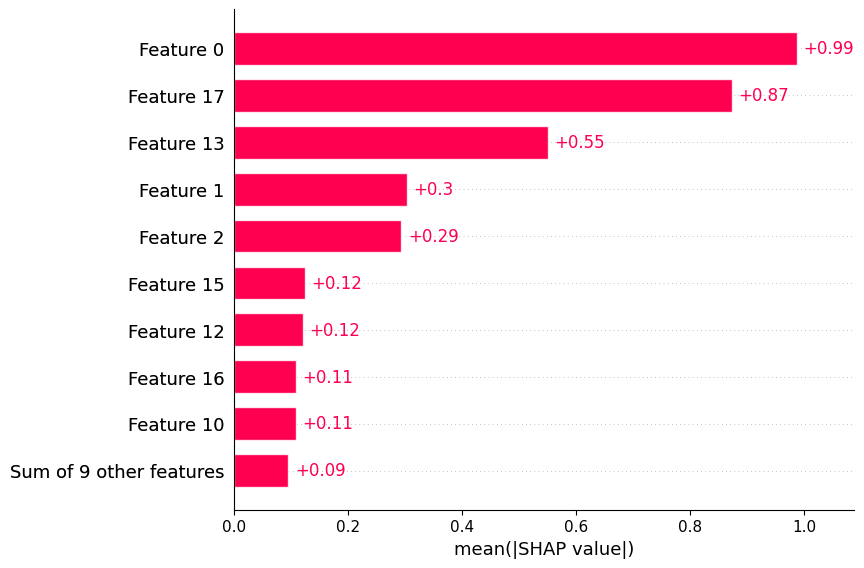

In [ ]:
shap.plots.bar(shap_values)

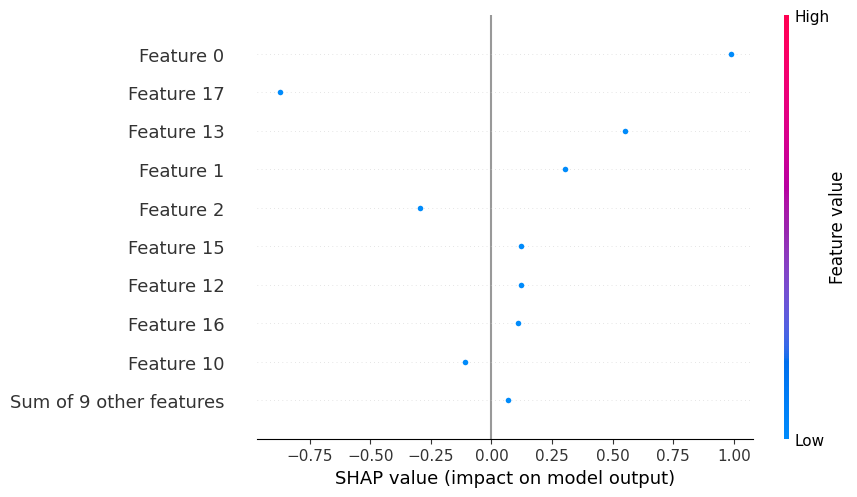

In [ ]:
shap.plots.beeswarm(shap_values)